In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import pandas as pd
from scipy.stats import norm

# Open DataFrame

In [2]:
df = pd.read_csv('datafiles/june4/data1.csv', sep=',')
df['ratio']=df['Integral 1200']/df['Integral 7400']
df = df[df['Integral 7400']>0]
df.head()

,Time,Integral 1200,Integral 7400,ratio
0,1.528150e+09,67986,111746.0,0.608398
1,1.528150e+09,37655,53317.0,0.706248
2,1.528150e+09,70037,117233.0,0.597417
3,1.528150e+09,53668,88457.0,0.606713
4,1.528150e+09,267520,448843.0,0.596021


# Preliminary Plot

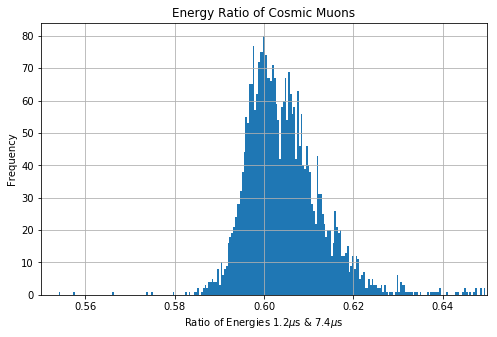

In [3]:
fig, ax = plt.subplots(figsize=(8,5))

df['ratio'].hist(bins=1000, ax=ax)

ax.set_xlim(0.55,0.65)
ax.set_xlabel('Ratio of Energies 1.2$\mu$s & 7.4$\mu$s')
ax.set_ylabel('Frequency')
ax.set_title('Energy Ratio of Cosmic Muons')
plt.show()

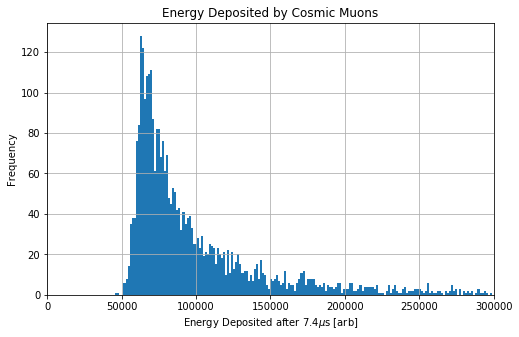

In [4]:
fig, ax = plt.subplots(figsize=(8,5))


df['Integral 7400'].hist(bins=1000, ax=ax)
ax.set_xlim(0,300000)
ax.set_xlabel('Energy Deposited after 7.4$\mu$s [arb]')
ax.set_ylabel('Frequency')
ax.set_title('Energy Deposited by Cosmic Muons')

plt.show()

# Fitting Methods to Find the Mode

Only fit values between 0.59 and 0.61 to normal curve:

In [5]:
mask = (df['ratio']>0.59) & (df['ratio']<0.61)
(mu, sigma) = norm.fit(df['ratio'][mask])

Get x and y values:

In [6]:
x = np.linspace(0.59, 0.61, 1000)

def gaussian(x, mu, sig):
    return (1/(np.sqrt(2*np.pi)*sig))*np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

Do plotting:

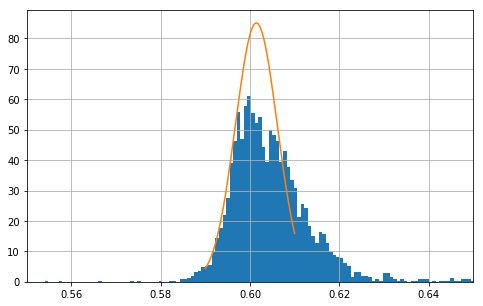

In [7]:
fig, ax = plt.subplots(figsize=(8,5))

df['ratio'].hist(bins=500, ax=ax, density=True)
ax.plot(x, gaussian(x, mu, sigma))

ax.set_xlim(0.55,0.65)
plt.show()

# 2D Histogram Stuff:

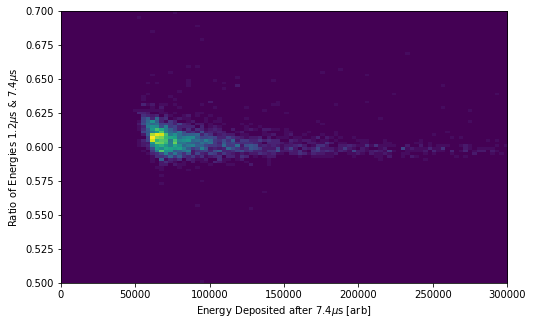

In [8]:
fig, ax = plt.subplots(figsize=(8,5))

ax.hist2d(df['Integral 7400'].values, df['ratio'].values,
          range=np.array([(0, 300000), (0.5, 0.7)]), bins=100)

ax.set_xlabel('Energy Deposited after 7.4$\mu$s [arb]')
ax.set_ylabel('Ratio of Energies 1.2$\mu$s & 7.4$\mu$s')

plt.show()